
Actividad 5: Uso de software para búsqueda.

Nombre: Angel Arturo Ramirez Molano

Matricula: 2109472

Hora clase: N1

In [62]:
#Cargar librerias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [63]:
#Cargar datos
keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

Preprocesamiento de los datos

In [7]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

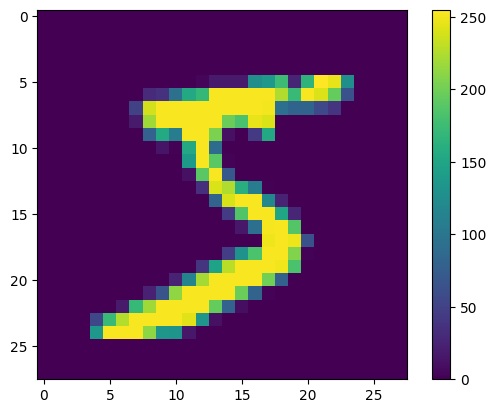

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

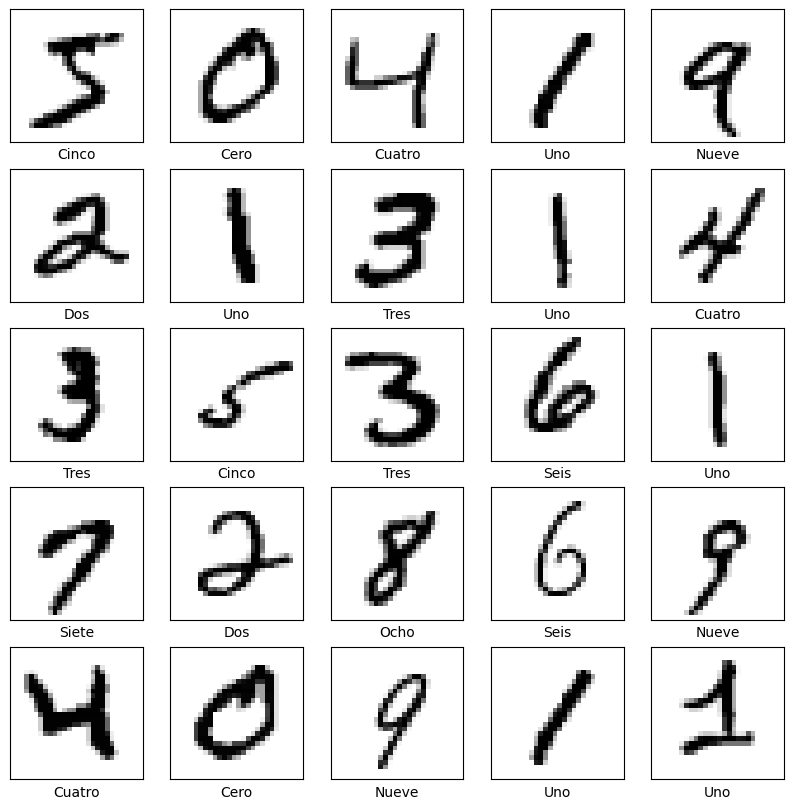

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Seleccion y entrenamiento

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [17]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 6ms/step - loss: 0.2612 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1112 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0766 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0211 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0155 - accura

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0749 - accuracy: 0.9795 - 747ms/epoch - 2ms/step

Test accuracy: 0.9794999957084656


In [25]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Prueba del modelo

In [33]:
# Prediccion 1
predictions[0]

array([1.6051696e-09, 9.2669449e-11, 1.8601976e-09, 8.4654047e-08,
       3.7245763e-14, 9.4540864e-10, 9.0909160e-14, 9.9999982e-01,
       7.0983255e-09, 5.3949636e-09], dtype=float32)

In [27]:
np.argmax(predictions[0])

7

In [28]:
test_labels[0]

7

In [29]:
predictions[5]

array([2.8533927e-12, 9.9992508e-01, 1.2320545e-10, 4.8338156e-10,
       3.1710520e-08, 8.8256176e-13, 1.8494392e-12, 7.4808122e-05,
       5.4005520e-09, 8.2414020e-11], dtype=float32)

In [30]:
np.argmax(predictions[5])

1

In [31]:
test_labels[5]

1

In [34]:
#prediccion 2
predictions[42]

array([3.4101851e-14, 1.5846583e-11, 3.1885610e-16, 4.4942026e-11,
       9.9999386e-01, 7.9818639e-13, 1.1060065e-14, 3.8282982e-07,
       1.3473070e-09, 5.7775355e-06], dtype=float32)

In [35]:
np.argmax(predictions[42])

4

In [36]:
test_labels[42]

4

In [37]:
#prediccion 3
predictions[26]

array([1.5085250e-08, 2.4456250e-14, 1.7510773e-09, 1.8061019e-08,
       1.9913723e-14, 1.7043641e-10, 7.1079871e-16, 9.9999982e-01,
       3.3223391e-13, 1.1039094e-07], dtype=float32)

In [39]:
np.argmax(predictions[26])

7

In [40]:
test_labels[26]

7

In [41]:
#prediccion 4
predictions[14]

array([3.4513127e-14, 9.9999994e-01, 8.0299092e-12, 3.0000376e-08,
       2.6848368e-10, 1.8813505e-12, 5.8866995e-11, 5.3983196e-09,
       4.0490217e-08, 2.6070086e-09], dtype=float32)

In [42]:
np.argmax(predictions[14])

1

In [43]:
test_labels[14]

1

In [44]:
#prediccion 5
predictions[66]

array([1.3474692e-06, 3.2696884e-02, 4.4640622e-08, 1.7616872e-09,
       2.8248180e-05, 2.7214259e-11, 9.6709484e-01, 1.7859087e-04,
       1.5966364e-08, 7.0967290e-09], dtype=float32)

In [45]:
np.argmax(predictions[66])

6

In [46]:
test_labels[66]

6

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

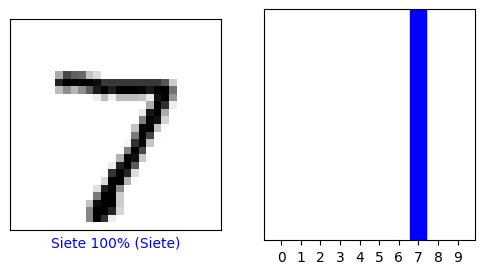

In [49]:
#Grafica de la prediccion 1
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

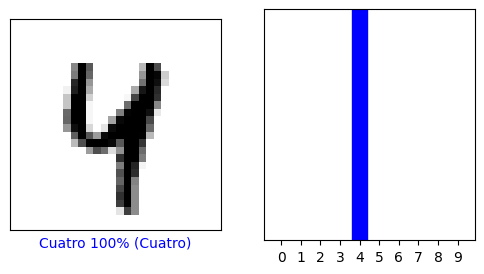

In [50]:
#Grafica de la prediccion 2
i = 42
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

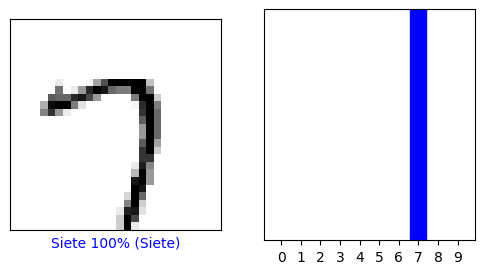

In [51]:
#Grafica de la prediccion 3
i = 26
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

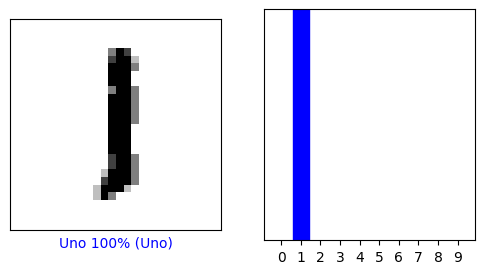

In [52]:
#Grafica de la prediccion 4
i = 14
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

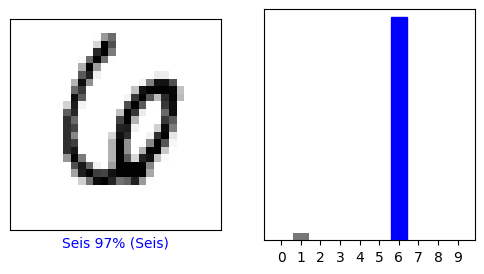

In [53]:
#Grafica de la prediccion 5
i = 66
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

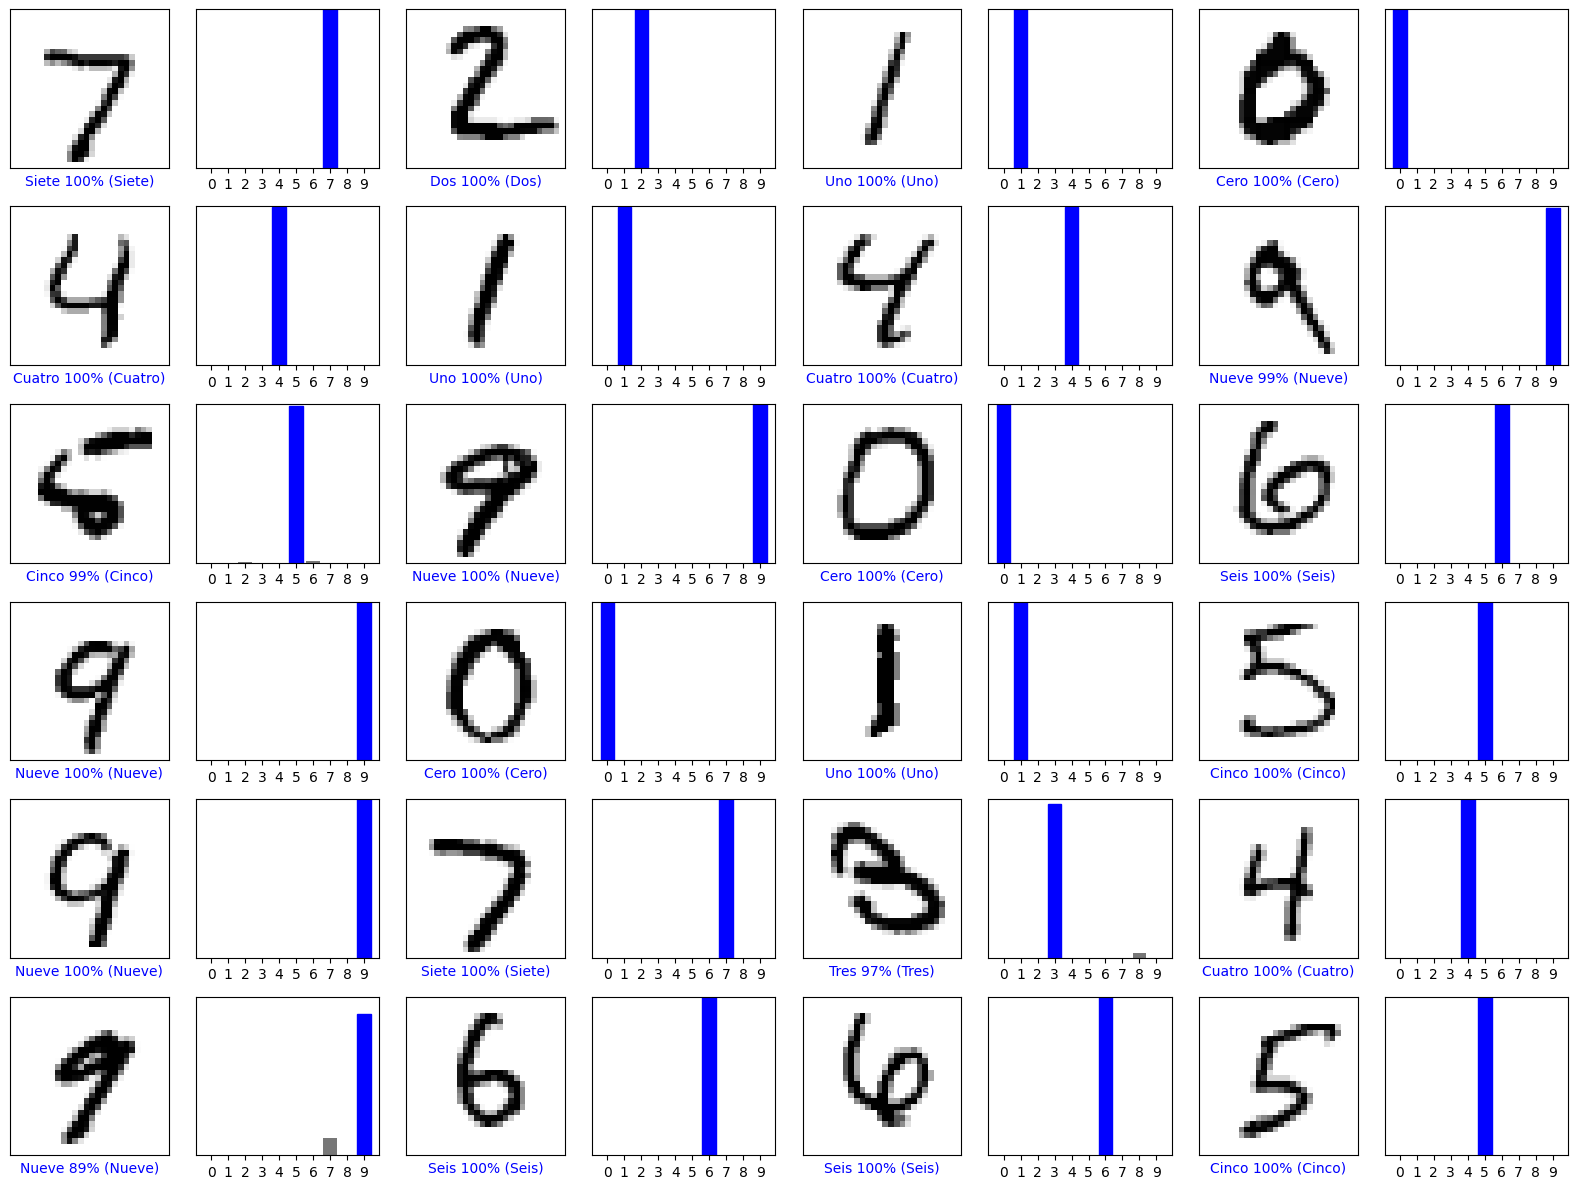

In [55]:
#Graficar multiples imagenes
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [56]:
#Modelo entrenado para una sola imagen
img = test_images[1]

print(img.shape)

(28, 28)


In [57]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [59]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 29ms/step
[[5.7775925e-13 2.7620578e-07 9.9999976e-01 2.0303720e-08 2.0131889e-19
  2.0200025e-10 1.0838402e-12 7.5444927e-20 1.3700914e-09 1.3060429e-15]]


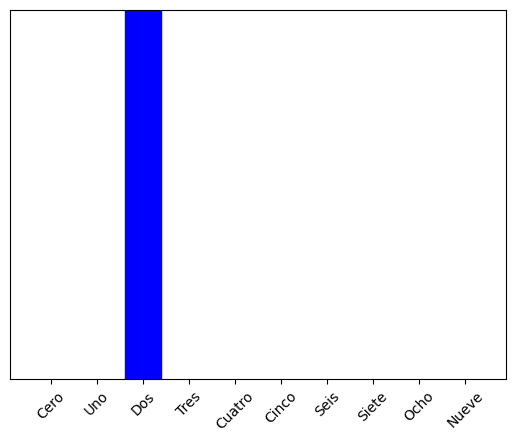

In [60]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [61]:
np.argmax(predictions_single[0])

2